In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'  # Updated URL
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '13e64d5f-8c0f-41d9-8caa-9562881600f6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2023-08-21T13:10:41.095Z', 'error_code': 0, 'error_message': None, 'elapsed': 119, 'credit_count': 1, 'notice': None, 'total_count': 9533}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10392, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)


dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.946386e+07,1.946386e+07,False,NaN,1,NaN,NaN,None,2023-08-21T13:08:00.000Z,26004.740640,1.093964e+10,12.7318,-0.234280,-0.749747,-11.362982,-12.883199,-13.709289,-4.653545,5.061527e+11,48.1040,5.460996e+11,None,2023-08-21T13:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 13:11:06.708512
1,1027,Ethereum,ETH,ethereum,7240,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202152e+08,1.202152e+08,True,NaN,2,NaN,NaN,None,2023-08-21T13:08:00.000Z,1670.966200,4.548146e+09,-4.7972,-0.222083,-0.396174,-9.377215,-11.422650,-11.960360,-9.760581,2.008755e+11,19.0927,2.008755e+11,None,2023-08-21T13:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 13:11:06.708512
2,825,Tether USDt,USDT,tether,59813,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.284648e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-21T13:08:00.000Z,0.999629,1.836228e+10,6.7251,-0.002302,-0.034460,0.076085,-0.049298,-0.048391,-0.058261,8.281571e+10,7.8712,8.665206e+10,None,2023-08-21T13:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-21 13:11:06.708512
3,1839,BNB,BNB,bnb,1573,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538517e+08,1.538517e+08,False,NaN,4,NaN,NaN,None,2023-08-21T13:08:00.000Z,209.426707,4.300542e+08,-2.4575,-0.783740,-3.543440,-12.785997,-13.659315,-15.589027,-33.236112,3.222065e+10,3.0625,3.222065e+10,None,2023-08-21T13:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 13:11:06.708512
4,52,XRP,XRP,xrp,1035,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.284187e+10,9.998850e+10,False,NaN,5,NaN,NaN,None,2023-08-21T13:08:00.000Z,0.524019,1.353013e+09,-12.2841,-0.131817,-4.297253,-16.487746,-31.941237,4.924536,13.656925,2.769014e+10,2.6316,5.240190e+10,None,2023-08-21T13:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 13:11:06.708512
5,3408,USD Coin,USDC,usd-coin,13681,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.596766e+10,2.596766e+10,False,NaN,6,NaN,NaN,None,2023-08-21T13:08:00.000Z,1.000012,2.482871e+09,8.0300,-0.010523,-0.007403,-0.016478,-0.000955,-0.015334,0.007038,2.596797e+10,2.4682,2.596797e+10,None,2023-08-21T13:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-21 13:11:06.708512
6,2010,Cardano,ADA,cardano,893,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.505030e+10,3.609196e+10,False,NaN,7,NaN,NaN,None,2023-08-21T13:08:00.000Z,0.266439,1.664185e+08,11.4620,-0.392409,-1.043561,-8.037288,-14.517645,-10.190382,-28.045676,9.338767e+09,0.8875,1.198976e+10,None,2023-08-21T13:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 13:11:06.708512
7,74,Dogecoin,DOGE,dogecoin,770,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.406803e+11,1.406803e+11,True,NaN,8,NaN,NaN,None,2023-08-21T13:08:00.000Z,0.062529,2.432276e+08,9.8354,-0.579270,-2.710306,-16.185437,-12.741468,-6.210806,-14.351398,8.796600e+09,0.8361,8.796600e+09,None,2023-08-21T13:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 13:11:06.708512
8,5426,Solana,SOL,solana,498,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosyste

In [11]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '13e64d5f-8c0f-41d9-8caa-9562881600f6',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.Timestamp.now()
    df = pd.concat([df, df2], ignore_index=True)
    df.to_csv('API_data.csv', index=False) 


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

In [12]:
df = pd.DataFrame()

In [16]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

PermissionError: [Errno 13] Permission denied: 'API_data.csv'

In [6]:
df

""


In [6]:
df72 = pd.read_csv(r'C:\Users\hp\API_data.csv')
df72

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.946286e+07,1.946286e+07,False,NaN,1,NaN,NaN,NaN,2023-08-20T13:48:00.000Z,26173.737370,9.702073e+09,-41.8530,-0.030654,0.889875,-10.854197,-12.241348,-10.248805,-3.173658,5.094157e+11,47.9950,5.496485e+11,NaN,2023-08-20T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 13:49:43.153462
1,1027,Ethereum,ETH,ethereum,7238,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202116e+08,1.202116e+08,True,NaN,2,NaN,NaN,NaN,2023-08-20T13:48:00.000Z,1676.968260,4.815576e+09,-25.4506,0.061478,0.928528,-9.301808,-11.333824,-8.240838,-8.103475,2.015910e+11,18.9931,2.015910e+11,NaN,2023-08-20T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 13:49:43.153462
2,825,Tether USDt,USDT,tether,59686,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.284648e+10,8.668426e+10,True,NaN,3,NaN,NaN,NaN,2023-08-20T13:48:00.000Z,0.999980,1.723187e+10,-28.5529,-0.004868,-0.017894,0.049160,-0.024428,-0.026364,-0.022508,8.284486e+10,7.8053,8.668256e+10,NaN,2023-08-20T13:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-20 13:49:43.153462
3,1839,BNB,BNB,bnb,1573,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538518e+08,1.538518e+08,False,NaN,4,NaN,NaN,NaN,2023-08-20T13:48:00.000Z,216.913910,4.401829e+08,7.6014,-0.043861,0.817547,-9.829681,-11.413272,-12.144308,-30.128728,3.337260e+10,3.1442,3.337260e+10,NaN,2023-08-20T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 13:49:43.153462
4,52,XRP,XRP,xrp,1034,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.284187e+10,9.998850e+10,False,NaN,5,NaN,NaN,NaN,2023-08-20T13:48:00.000Z,0.547034,1.563216e+09,31.5409,0.293984,8.227355,-12.873730,-29.454352,10.845213,18.064795,2.890629e+10,2.7222,5.470338e+10,NaN,2023-08-20T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 13:49:43.153462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,6636,Polkadot,DOT,polkadot-new,554,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.214936e+09,1.347195e+09,True,NaN,11,NaN,NaN,NaN,2023-08-20T14:53:00.000Z,4.490235,8.048570e+07,-13.5314,-0.697292,-0.118702,-10.651479,-18.310251,-5.163426,-15.404708,5.455347e+09,0.5156,6.049223e+09,NaN,2023-08-20T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 14:54:55.795313
686,3890,Polygon,MATIC,polygon,812,2019-04-28T00:00:00.000Z,"['pos', 'platform', 'enterprise-solutions', 'z...",1.000000e+10,9.319469e+09,1.000000e+10,False,NaN,12,NaN,NaN,NaN,2023-08-20T14:53:00.000Z,0.575299,2.211928e+08,-5.3902,-0.308957,-0.623689,-15.612724,-25.054336,-11.714203,-33.636657,5.361477e+09,0.5065,5.752986e+09,NaN,2023-08-20T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 14:54:55.795313
687,4943,Dai,DAI,multi-collateral-dai,2509,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'asset-backed-stablecoi...",NaN,5.347889e+09,5.347889e+09,True,NaN,13,NaN,NaN,NaN,2023-08-20T14:53:00.000Z,0.999622,6.263389e+07,-23.8484,-0.047859,-0.042593,-0.008844,-0.004163,-0.070328,-0.021888,5.345867e+09,0.5052,5.345867e+09,NaN,2023-08-20T14:53:00.000Z,1027.0,Ethereum,ETH,ethereum

In [7]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [17]:
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19463862.00000,19463862.00000,False,NaN,1,NaN,NaN,None,2023-08-21T13:13:00.000Z,26001.07949,10960026079.96486,12.69940,-0.24966,-0.71106,-11.31635,-12.90633,-13.74985,-4.70821,506081423066.56512,48.11600,546022669313.91998,None,2023-08-21T13:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 15:14:41.485068
1,1027,Ethereum,ETH,ethereum,7240,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120215150.71990,120215150.71990,True,NaN,2,NaN,NaN,None,2023-08-21T13:13:00.000Z,1669.78445,4539241354.24405,-5.31460,-0.30921,-0.41410,-9.41796,-11.51611,-12.04685,-9.84891,200733389875.67126,19.08500,200733389875.67001,None,2023-08-21T13:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 15:14:41.485068
2,825,Tether USDt,USDT,tether,59813,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82846484080.77916,86684257831.18761,True,NaN,3,NaN,NaN,None,2023-08-21T13:13:00.000Z,0.99974,18394581152.05082,6.77800,0.02157,-0.03087,0.09364,-0.03370,-0.04248,-0.04177,82824612193.49281,7.87490,86661372752.38000,None,2023-08-21T13:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-21 15:14:41.485068
3,1839,BNB,BNB,bnb,1573,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153851695.52068,153851695.52068,False,NaN,4,NaN,NaN,None,2023-08-21T13:13:00.000Z,209.31319,431810481.46127,-1.86350,-1.01503,-3.53249,-12.80278,-13.68635,-15.53399,-33.24471,32203188556.22294,3.06180,32203188556.22000,None,2023-08-21T13:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 15:14:41.485068
4,52,XRP,XRP,xrp,1035,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52841868447.00000,99988501123.00000,False,NaN,5,NaN,NaN,None,2023-08-21T13:13:00.000Z,0.52410,1351034195.40827,-12.57700,-0.25431,-4.10761,-16.46429,-31.96055,5.03821,13.73796,27694523286.77901,2.63310,52410189307.66000,None,2023-08-21T13:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 15:14:41.485068
5,3408,USD Coin,USDC,usd-coin,13681,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25967657482.00212,25967657482.00212,False,NaN,6,NaN,NaN,None,2023-08-21T13:13:00.000Z,1.00018,2500785259.78281,8.67660,0.02267,-0.00197,0.00757,0.02605,0.00707,0.01064,25972422518.86663,2.46940,25972422518.87000,None,2023-08-21T13:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-21 15:14:41.485068
6,2010,Cardano,ADA,cardano,893,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35050298665.63400,36091964625.42500,False,NaN,7,NaN,NaN,None,2023-08-21T13:13:00.000Z,0.26638,166428160.07477,11.20370,-0.56139,-0.93261,-8.00965,-14.58514,-9.97235,-28.03806,9336559841.93102,0.88770,11986921906.00000,None,2023-08-21T13:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 15:14:41.485068
7,74,Dogecoin,DOGE,dogecoin,770,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140680296383.70526,140680296383.70526,True,NaN,8,NaN,NaN,None,2023-08-21T13:13:00.000Z,0.06249,243560454.40722,10.06150,-0.65741,-2.66364,-16.14393,-12.80019,-6.18879,-14.37348,8791281655.93913,0.83590,8791281655.94000,None,20

In [18]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.24966,-0.71106,-11.31635,-12.90633,-13.74985,-4.70821
Ethereum,-0.30921,-0.41410,-9.41796,-11.51611,-12.04685,-9.84891
Tether USDt,0.02157,-0.03087,0.09364,-0.03370,-0.04248,-0.04177
BNB,-1.01503,-3.53249,-12.80278,-13.68635,-15.53399,-33.24471
XRP,-0.25431,-4.10761,-16.46429,-31.96055,5.03821,13.73796
USD Coin,0.02267,-0.00197,0.00757,0.02605,0.00707,0.01064
Cardano,-0.56139,-0.93261,-8.00965,-14.58514,-9.97235,-28.03806
Dogecoin,-0.65741,-2.66364,-16.14393,-12.80019,-6.18879,-14.37348
Solana,-0.60872,-3.51643,-13.31628,-17.26878,24.24992,6.30879


In [20]:
pd.set_option('display.max_rows', None)  # Display all rows
df4 = df3.stack()
print(df4)

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.24966
             quote.USD.percent_change_24h    -0.71106
             quote.USD.percent_change_7d    -11.31635
             quote.USD.percent_change_30d   -12.90633
             quote.USD.percent_change_60d   -13.74985
             quote.USD.percent_change_90d    -4.70821
Ethereum     quote.USD.percent_change_1h     -0.30921
             quote.USD.percent_change_24h    -0.41410
             quote.USD.percent_change_7d     -9.41796
             quote.USD.percent_change_30d   -11.51611
             quote.USD.percent_change_60d   -12.04685
             quote.USD.percent_change_90d    -9.84891
Tether USDt  quote.USD.percent_change_1h      0.02157
             quote.USD.percent_change_24h    -0.03087
             quote.USD.percent_change_7d      0.09364
             quote.USD.percent_change_30d    -0.03370
             quote.USD.percent_change_60d    -0.04248
             quote.USD.percent_change_90

In [21]:
type(df4)

pandas.core.series.Series

In [22]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.24966
            quote.USD.percent_change_24h  -0.71106
            quote.USD.percent_change_7d  -11.31635
            quote.USD.percent_change_30d -12.90633
            quote.USD.percent_change_60d -13.74985
            quote.USD.percent_change_90d  -4.70821
Ethereum    quote.USD.percent_change_1h   -0.30921
            quote.USD.percent_change_24h  -0.41410
            quote.USD.percent_change_7d   -9.41796
            quote.USD.percent_change_30d -11.51611
            quote.USD.percent_change_60d -12.04685
            quote.USD.percent_change_90d  -9.84891
Tether USDt quote.USD.percent_change_1h    0.02157
            quote.USD.percent_change_24h  -0.03087
            quote.USD.percent_change_7d    0.09364
            quote.USD.percent_change_30d  -0.03370
            quote.USD.percent_change_60d  -0.04248
            quote.USD.percent_change_90d  -0.04177
BNB         quote.USD.percent_change_1h   -1.01503
            quote.USD.percent_change_24h  -3.53249
            quote.USD.percent_change_7d  -12.80278
            quote.USD.percent_change_30d -13.68635
            quote.USD.percent_change_60d -15.53399
            quote.USD.percent_change_90d -33.24471
XRP         quote.USD.percent_change_1h   -0.25431
            quote.USD.percent_change_24h  -4.10761
            quote.USD.percent_change_7d  -16.46429
            quote.USD.percent_change_30d -31.96055
            quote.USD.percent_change_60d   5.03821
            quote.USD.percent_change_90d  13.73796
USD Coin    quote.USD.percent_change_1h    0.02267
            quote.USD.percent_change_24h  -0.00197
            quote.USD.percent_change_7d    0.00757
            quote.USD.percent_change_30d   0.02605
            quote.USD.percent_change_60d   0.00707
            quote.USD.percent_change_90d   0.01064
Cardano     quote.USD.percent_change_1h   -0.56139
            quote.USD.percent_change_24h  -0.93261
            quote.USD.percent_change_7d   -8.00965
            quote.USD.percent_change_30d -14.58514
            quote.USD.percent_change_60d  -9.97235
            quote.USD.percent_change_90d -28.03806
Dogecoin    quote.USD.percent_change_1h   -0.65741
            quote.USD.percent_change_24h  -2.66364
            quote.USD.percent_change_7d  -16.14393
            quote.USD.percent_change_30d -12.80019
            quote.USD.percent_change_60d  -6.18879
            quote.USD.percent_change_90d -14.37348
Solana      quote.USD.percent_change_1h   -0.60872
            quote.USD.percent_change_24h  -3.51643
            quote.USD.percent_change_7d  -13.31628
            quote.USD.percent_change_30d -17.26878
            quote.USD.percent_change_60d  24.24992
            quote.USD.percent_change_90d   6.30879
TRON        quote.USD.percent_change_1h   -0.26156
            quote.USD.percent_change_24h  -0.54800
            quote.USD.percent_change_7d   -3.41497
            quote.USD.percent_change_30d -13.13836
            quote.USD.percent_change_60d   3.09997
            quote.USD.percent_change_90d  -3.82047
Polkadot    quote.USD.percent_change_1h   -0.60569
            quote.USD.percent_change_24h  -1.14205
            quote.USD.percent_change_7d  -10.13035
            quote.USD.percent_change_30d -16.43704
            quote.USD.percent_change_60d  -7.82837
            quote.USD.percent_change_90d -16.72873
Dai         quote.USD.percent_change_1h   -0.04714
            quote.USD.percent_change_24h  -0.08060
            quote.USD.percent_change_7d    0.00074
            quote.USD.percent_change_30d   0.00429
            quote.USD.percent_change_60d  -0.05827
            quote.USD.percent_change_90d  -0.01314
Polygon     quote.USD.percent_change_1h   -0.71416
            quote.USD.percent_change_24h  -2.69585
            quote.USD.percent_change_7d  -16.96115
            quote.USD.percent_change_30d -26.15840
            quote.USD.percent_change_60d -16.97501
            quo

In [23]:
df5.count()

values    90
dtype: int64

In [26]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.24966
1,Bitcoin,quote.USD.percent_change_24h,-0.71106
2,Bitcoin,quote.USD.percent_change_7d,-11.31635
3,Bitcoin,quote.USD.percent_change_30d,-12.90633
4,Bitcoin,quote.USD.percent_change_60d,-13.74985
5,Bitcoin,quote.USD.percent_change_90d,-4.70821
6,Ethereum,quote.USD.percent_change_1h,-0.30921
7,Ethereum,quote.USD.percent_change_24h,-0.41410
8,Ethereum,quote.USD.percent_change_7d,-9.41796
9,Ethereum,quote.USD.percent_change_30d,-11.51611


In [27]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.24966
1,Bitcoin,quote.USD.percent_change_24h,-0.71106
2,Bitcoin,quote.USD.percent_change_7d,-11.31635
3,Bitcoin,quote.USD.percent_change_30d,-12.90633
4,Bitcoin,quote.USD.percent_change_60d,-13.74985
5,Bitcoin,quote.USD.percent_change_90d,-4.70821
6,Ethereum,quote.USD.percent_change_1h,-0.30921
7,Ethereum,quote.USD.percent_change_24h,-0.41410
8,Ethereum,quote.USD.percent_change_7d,-9.41796
9,Ethereum,quote.USD.percent_change_30d,-11.51611


In [33]:
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h ,quote.USD.percent_change_24h, quote.USD.percent_change_7d ,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d'],['1h, 24h,7d,30d,60d, 90d '])

In [50]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'], ['1h'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.24966
1,Bitcoin,24h,-0.71106
2,Bitcoin,7d,-11.31635
3,Bitcoin,30d,-12.90633
4,Bitcoin,60d,-13.74985
5,Bitcoin,90d,-4.70821
6,Ethereum,1h,-0.30921
7,Ethereum,24h,-0.41410
8,Ethereum,7d,-9.41796
9,Ethereum,30d,-11.51611


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

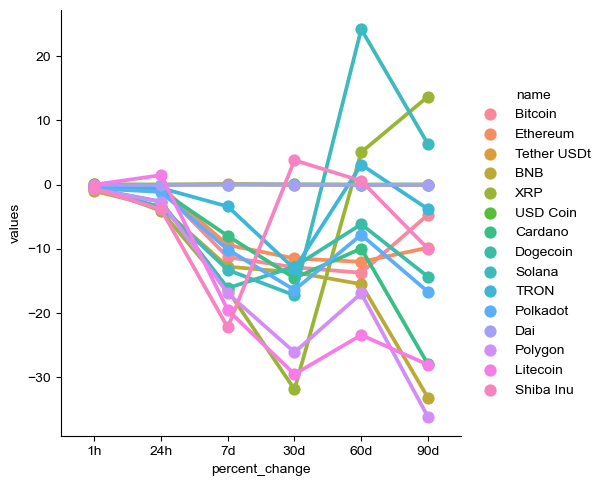

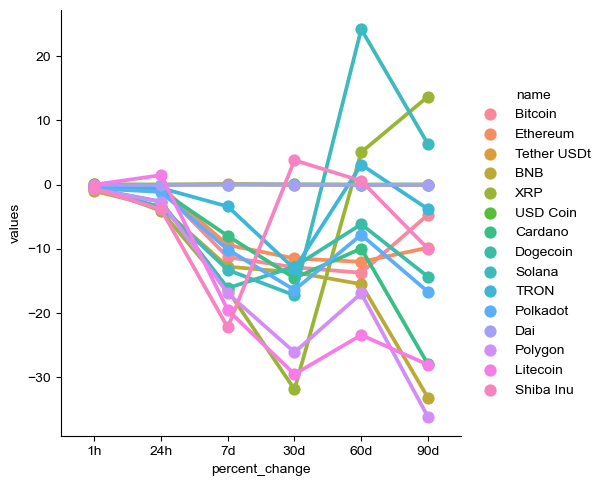

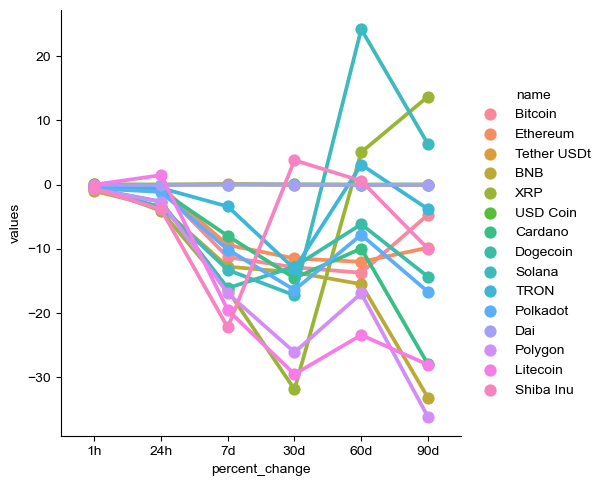

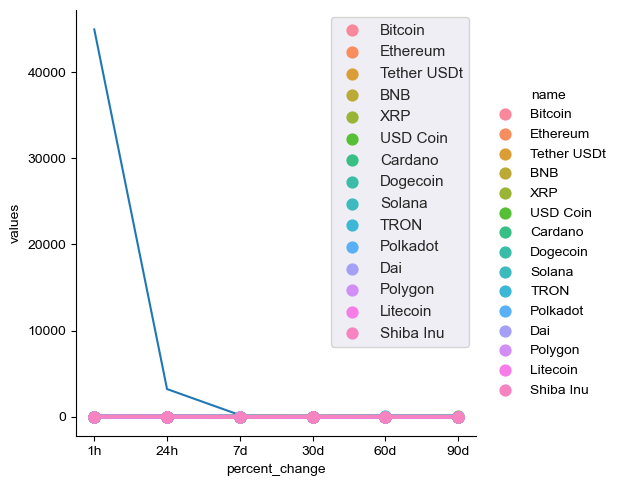

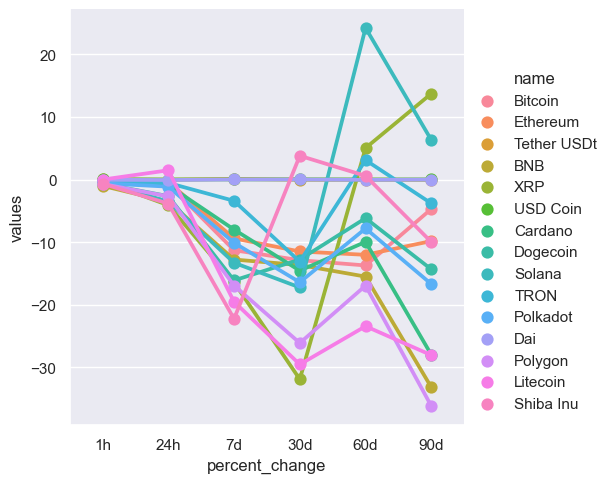

In [62]:
# Create a categorical plot using Seaborn
plot = sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

# Display the plot
plt.show()

In [67]:
# Create a dictionary with your data
data = {
    'name': ['Bitcoin', 'Ethereum', 'Litecoin'],
    'quote.USD.price': [45000, 3200, 180],
    'timestamp': ['2023-08-01', '2023-08-02', '2023-08-03']
}

# Create a DataFrame using the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

       name  quote.USD.price   timestamp
0   Bitcoin            45000  2023-08-01
1  Ethereum             3200  2023-08-02
2  Litecoin              180  2023-08-03


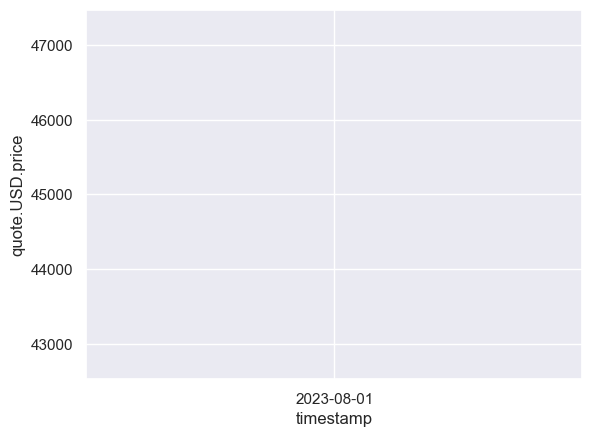

In [70]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)
plt.show()